# Taller 1: Extracción de Datos y Análisis de Sentimiento en E-commerce

## Grupo 6:
 
- Carlos Mauricio Arteaga 

- Miguel Ángel Pablos  

- María Alejandra Olarte

In [2]:
#Librerias utilizadas
import requests #Libreria para hacer peticiones a paginas web
from bs4 import BeautifulSoup #Libreria para hacer web scraping
import pandas as pd #Libreria para manejo de datos
from urllib.error import URLError #Libreria para manejo de errores de URL
import re #Libreria para manejo de expresiones regulares
from nltk.tokenize import word_tokenize #Libreria para tokenizar palabras

#Requisitos de extraccion, identificando clases, contenedores y donde estan los datos que queremos extraer. 

Marca : <span class="poly-component__brand">SAMSUNG</span>

Caracteristicas: <a class="" href="https://www.mercadolibre.com.co/samsung-galaxy-a35-5g-256-gb-azul-oscuro-8-gb-ram/p/MCO34729843#polycard_client=search-nordic&amp;searchVariation=MCO34729843&amp;position=14&amp;search_layout=stack&amp;type=product&amp;tracking_id=cefb3306-b01c-43cb-9f61-7d4e7358d480&amp;wid=MCO2631944424&amp;sid=search">Samsung Galaxy A35 5g 256 GB Azul oscuro 8 GB RAM</a>

Calificacion: <span class="andes-visually-hidden">Calificación 4.9 de 5 (308 calificaciones)</span> 

Enlace: <a class="" href="https://www.mercadolibre.com.co/samsung-galaxy-a35-5g-256-gb-azul-oscuro-8-gb-ram/p/MCO34729843#polycard_client=search-nordic&amp;searchVariation=MCO34729843&amp;position=14&amp;search_layout=stack&amp;type=product&amp;tracking_id=cefb3306-b01c-43cb-9f61-7d4e7358d480&amp;wid=MCO2631944424&amp;sid=search">Samsung Galaxy A35 5g 256 GB Azul oscuro 8 GB RAM</a>

Precio: <span class="andes-money-amount__fraction" aria-hidden="true">3.554.900</span>

## Obteniendo datos de la tarjeta principal.

In [3]:
# Lista de URLs que vamos a scrapear. (manejo de paginación)
urls = [
    'https://listado.mercadolibre.com.co/celulares#D[A:celulares]',
    'https://listado.mercadolibre.com.co/celulares-telefonos/celulares-smartphones/celulares_Desde_51_NoIndex_True',
    'https://listado.mercadolibre.com.co/celulares-telefonos/celulares-smartphones/celulares_Desde_101_NoIndex_True',
    'https://listado.mercadolibre.com.co/celulares-telefonos/celulares-smartphones/celulares_Desde_151_NoIndex_True',
    'https://listado.mercadolibre.com.co/celulares-telefonos/celulares-smartphones/celulares_Desde_201_NoIndex_True',
]

# Define headers, para simulación de un navegador y evitar bloqueos.
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Lista vacia donde vamos a guardar los datos.
data = []

# Ciclo para recorrer cada URL.
for i, url in enumerate(urls, start=1):
    print(f"Processing {i} of {len(urls)}")
    
    # Enviar una solicitud HTTP para obtener el contenido de la página.
    response = requests.get(url, headers=headers)

    # Lanzar una excepción si la solicitud no fue exitosa.
    if response.status_code != 200:
        raise Exception(f"Failed to retrieve data from {url}. \nStatus code: {response.status_code}, \nError: {response.text}")
    
    # Parsear el contenido HTML de la página usando BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraer los contenedores de los productos. (Li, que es el contenedor de cada producto)
    products = soup.find_all('li', {'class': 'ui-search-layout__item'})

    # Ciclo para recorrer cada producto y extraer la información.
    for product in products:
        # Extraer la marca.
        marca_tag = product.find('span', {'class': 'poly-component__brand'})
        marca = marca_tag.text.strip() if marca_tag else 'Marca No Encontrada'

        # Extraer las caracteristicas.
        caracteristicas_tag = product.find('a', {'class': ''})
        caracteristicas = caracteristicas_tag.text.strip() if caracteristicas_tag else 'Características No Encontradas'

        # Extraer la calificacion.
        calificacion_tag = product.find('span', {'class': 'andes-visually-hidden'})
        calificacion = calificacion_tag.text.strip() if calificacion_tag else 'Calificación No Encontrada'

        # Extraer el precio.
        precio_tag = product.find('span', {'class': 'andes-money-amount__fraction'})
        precio = precio_tag.text.strip() if precio_tag else 'Precio No Encontrado'

        # Extraer el enlace.
        enlace_tag = product.find('a', href=True)
        enlace = enlace_tag['href'] if enlace_tag else 'Enlace No Encontrado'
        
        # Append extracted data to the list
        data.append({
            "Marca": marca,
            "Características": caracteristicas,
            "Calificación": calificacion,
            "Precio": precio,
            "Enlace": enlace
            
        })

# Crear un DataFrame a partir de la lista de diccionarios (data) para visualizar los datos.
df = pd.DataFrame(data)

# Visualizar el DataFrame obtenido.
print(df)


Processing 1 of 5
Processing 2 of 5
Processing 3 of 5
Processing 4 of 5
Processing 5 of 5
                   Marca                                    Características  \
0                SAMSUNG          Celular Samsung Galaxy A55 5g 256gb Black   
1    Marca No Encontrada  Celular Tigers Flip B9 4g Tapita Con Camara Y Mp3   
2                SAMSUNG  Samsung Galaxy A55 5G Dual SIM 256 GB azul osc...   
3    Marca No Encontrada  Xiaomi Redmi Note 13 4G Dual SIM 256 GB azul 8...   
4    Marca No Encontrada  Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB neg...   
..                   ...                                                ...   
253  Marca No Encontrada             Infinix Note 40 256 Gb + 8 Gb Ram Gris   
254               HUAWEI  Huawei Y90 Dual Sim 128 Gb 6 Gb Ram Nova Serie...   
255  Marca No Encontrada  Celular  Vivo Y27 128gb Rom 6gb Ram Sea Blue Azul   
256              SAMSUNG           Samsung Galaxy A06 128gb 4gb Light Green   
257  Marca No Encontrada      Rokit iO Pr

In [4]:
# Vizualizar el DataFrame obtenido con los datos crudos.
df

,Marca,Características,Calificación,Precio,Enlace
0,SAMSUNG,Celular Samsung Galaxy A55 5g 256gb Black,Calificación 5 de 5 (8 calificaciones),2.099.920,https://click1.mercadolibre.com.co/mclics/clic...
1,Marca No Encontrada,Celular Tigers Flip B9 4g Tapita Con Camara Y Mp3,Calificación 5 de 5 (5 calificaciones),125.000,https://click1.mercadolibre.com.co/mclics/clic...
2,SAMSUNG,Samsung Galaxy A55 5G Dual SIM 256 GB azul osc...,Calificación 4.9 de 5 (793 calificaciones),3.019.900,https://www.mercadolibre.com.co/samsung-galaxy...
3,Marca No Encontrada,Xiaomi Redmi Note 13 4G Dual SIM 256 GB azul 8...,"Calificación 4.8 de 5 (2,623 calificaciones)",924.900,https://www.mercadolibre.com.co/xiaomi-redmi-n...
4,Marca No Encontrada,Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB neg...,"Calificación 4.9 de 5 (2,116 calificaciones)",2.349.834,https://www.mercadolibre.com.co/xiaomi-poco-po...
...,...,...,...,...,...
253,Marca No Encontrada,Infinix Note 40 256 Gb + 8 Gb Ram Gris,Calificación No Encontrada,759.900,https://articulo.mercadolibre.com.co/MCO-14901...
254,HUAWEI,Huawei Y90 Dual Sim 128 Gb 6 Gb Ram Nova Serie...,Calificación 4.8 de 5 (10 calificaciones),395.000,https://articulo.mercadolibre.com.co/MCO-24476...
255,Marca No Encontrada,Celular Vivo Y27 128gb Rom 6gb Ram Sea Blue Azul,Calificación No Encontrada,595.000,https://www.mercadolibre.com.co/celular-vivo-y...
256,SAMSUNG,Samsung Galaxy A06 128gb 4gb Light Green,Calificación 5 de 5 (1 calificaciones),499.900,https://www.mercadolibre.com.co/samsung-galaxy...


### Hallazgos:
- Este código nos ayuda a extraer la información que encontramos en la primera capa. 
En esta parte el scrip nos ayuda a obtener la información relevante relacionada a la marca, características principales del producto, calificación del producto, precio actual de compra y el enlace primario de cada producto. 

### Retos:
- La página de MercadoLibre tiene una capa dinámica que dificulta la extracción de los datos, hay un componente aleatorio agregado al HTML que ocasiona que cada vez que se ejecute el script los datos obtenidos varíen, esto puede ser por algún tipo de filtrado de la pagina con cambios como venta de celulares, comentarios recientes o actualizaciones del producto. O simplemente una medida de MercadoLibre para que scrapear la pagina no sea tan fácil. 
Para trabajar con los datos obtenidos, estos van a necesitar preprocesamiento y limpieza, esto se hará posterior mente. 
Datos como nombre del vendedor, calificación del vendedor, cantidad de comentarios y las opiniones de los compradores (Comentarios) están en una capa mas profunda de los productos por lo que fue necesario iterar en las URLS obtenidas. 


## Obtener datos faltantes iterando en cada enlace de producto en la capa mas profunda.

In [5]:
# Crear listas para almacenar datos.
Vendedor = []
Calificacion_Vendedor = []
Comentarios_num = []
Comentario = []

# Headers para simular un navegador web, esto ayuda a evitar bloqueos por parte del servidor.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Iterar sobre las URLs de productos
for url in df['Enlace']:
    try:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")

        # Extraer el nombre del vendedor
        vendedor = soup.find('span', {'class': 'ui-pdp-color--BLACK ui-pdp-size--LARGE ui-pdp-family--REGULAR ui-seller-data-header__title non-selectable'})
        Vendedor.append(vendedor.text.strip() if vendedor else "N/A")

        # Extraer la calificación del vendedor
        calificacion_vendedor = soup.find('div', {'class': 'ui-seller-data-status__lider-seller'})
        Calificacion_Vendedor.append(calificacion_vendedor.text.strip() if calificacion_vendedor else "N/A")

        # Extraer cantidad de comentarios del producto
        comentarios = soup.find_all('span', {'class': 'total-opinion'})
        comentarios_texto = [comentario.text.strip() for comentario in comentarios]
        Comentarios_num.append(comentarios_texto if comentarios_texto else ["Sin comentarios"])

        # Extraer muetra de comentarios
        # Extraer los comentarios
        comentarios = soup.find_all('p', {'data-testid': 'comment-content-component'})
        comentarios_texto = [comentario.text.strip() for comentario in comentarios]
        Comentario.append(comentarios_texto if comentarios_texto else ["Sin comentarios"])

    except Exception as e:
        print(f"Error al procesar {url}: {e}")
        Vendedor.append("Error")
        Calificacion_Vendedor.append("Error")
        Comentarios_num.append(["Error"])
        Comentario.append(["Error"])

# Agregar los nuevos datos al DataFrame original
df['Vendedor'] = Vendedor
df['Calificacion_Vendedor'] = Calificacion_Vendedor
df['Comentarios'] = Comentarios_num
df['Comentario'] = Comentario


# Mostrar el DataFrame
print(df)


                   Marca                                    Características  \
0                SAMSUNG          Celular Samsung Galaxy A55 5g 256gb Black   
1    Marca No Encontrada  Celular Tigers Flip B9 4g Tapita Con Camara Y Mp3   
2                SAMSUNG  Samsung Galaxy A55 5G Dual SIM 256 GB azul osc...   
3    Marca No Encontrada  Xiaomi Redmi Note 13 4G Dual SIM 256 GB azul 8...   
4    Marca No Encontrada  Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB neg...   
..                   ...                                                ...   
253  Marca No Encontrada             Infinix Note 40 256 Gb + 8 Gb Ram Gris   
254               HUAWEI  Huawei Y90 Dual Sim 128 Gb 6 Gb Ram Nova Serie...   
255  Marca No Encontrada  Celular  Vivo Y27 128gb Rom 6gb Ram Sea Blue Azul   
256              SAMSUNG           Samsung Galaxy A06 128gb 4gb Light Green   
257  Marca No Encontrada      Rokit iO Pro 3D Dual SIM 64 GB negro 4 GB RAM   

                                     Calificación  

In [6]:
#visualizar el DataFrame final con los datos crudos.
df.head(10)

,Marca,Características,Calificación,Precio,Enlace,Vendedor,Calificacion_Vendedor,Comentarios,Comentario
0,SAMSUNG,Celular Samsung Galaxy A55 5g 256gb Black,Calificación 5 de 5 (8 calificaciones),2.099.920,https://click1.mercadolibre.com.co/mclics/clic...,N/A,MercadoLíder Platinum¡Uno de los mejores del s...,[2 comentarios],[Fue la selección correcta para mis requerimie...
1,Marca No Encontrada,Celular Tigers Flip B9 4g Tapita Con Camara Y Mp3,Calificación 5 de 5 (5 calificaciones),125.000,https://click1.mercadolibre.com.co/mclics/clic...,Vendido por TG PRODUCTOS,MercadoLíder Platinum¡Uno de los mejores del s...,[2 comentarios],"[Bueno para cuchos.\nEs 2g, 3g y 4g., Super.]"
2,SAMSUNG,Samsung Galaxy A55 5G Dual SIM 256 GB azul osc...,Calificación 4.9 de 5 (793 calificaciones),3.019.900,https://www.mercadolibre.com.co/samsung-galaxy...,N/A,MercadoLíder Platinum¡Uno de los mejores del s...,[221 comentarios],[Llevo ya casi un mes con él y es un excelente...
3,Marca No Encontrada,Xiaomi Redmi Note 13 4G Dual SIM 256 GB azul 8...,"Calificación 4.8 de 5 (2,623 calificaciones)",924.900,https://www.mercadolibre.com.co/xiaomi-redmi-n...,Vendido por OFFERBUYS,MercadoLíder Platinum¡Uno de los mejores del s...,[716 comentarios],[En teléfono por ese precio. Realmente xiaomi ...
4,Marca No Encontrada,Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB neg...,"Calificación 4.9 de 5 (2,116 calificaciones)",2.349.834,https://www.mercadolibre.com.co/xiaomi-poco-po...,Vendido por CELUMOVIL STORE,MercadoLíder Platinum¡Uno de los mejores del s...,[719 comentarios],"[Una bestia de celular, corre todos los juegos..."
5,Marca No Encontrada,Xiaomi Redmi 13C Dual SIM 256 GB midnight blac...,"Calificación 4.7 de 5 (3,570 calificaciones)",799.900,https://www.mercadolibre.com.co/xiaomi-redmi-1...,Vendido por OFFERBUYS,MercadoLíder Platinum¡Uno de los mejores del s...,[999 comentarios],"[Buen teléfono relación calidad precio, muy bu..."
6,SAMSUNG,Samsung Galaxy S23 Ultra (eSIM) 5G Dual SIM 25...,Calificación 4.9 de 5 (970 calificaciones),5.934.262,https://www.mercadolibre.com.co/samsung-galaxy...,N/A,MercadoLíder Platinum¡Uno de los mejores del s...,[329 comentarios],"[El mejor celular del mundo. !!!., Una camara ..."
7,Marca No Encontrada,Xiaomi Redmi Note 13 Pro 4G Dual SIM 256 GB ne...,Calificación 4.8 de 5 (833 calificaciones),999.900,https://www.mercadolibre.com.co/xiaomi-redmi-n...,Vendido por OFFERBUYS,MercadoLíder Platinum¡Uno de los mejores del s...,[221 comentarios],"[Está bueno y funciona bien, esperemos que no ..."
8,HONOR,Honor Magic6 Lite Dual SIM 256 GB verde 8 GB RAM,Calificación 4.9 de 5 (116 calificaciones),1.958.167,https://www.mercadolibre.com.co/honor-magic6-l...,Vendido por CELUMOVIL STORE,MercadoLíder Platinum¡Uno de los mejores del s...,[36 comentarios],"[Excelente producto, viene en su empaque origi..."
9,SAMSUNG,Samsung Galaxy A35 5g 256 GB Azul oscuro 8 GB RAM,Calificación 4.8 de 5 (313 calificaciones),1.436.600,https://www.mercadolibre.com.co/samsung-galaxy...,Vendido por OFFERBUYS,MercadoLíder Platinum¡Uno de los mejores del s...,[104 comentarios],"[Le compré el celular a mi esposa, hizo el cam..."


In [7]:
# Crear una copia del DataFrame para realizar limpieza de datos.
df_copia = df.copy()
df_copia

,Marca,Características,Calificación,Precio,Enlace,Vendedor,Calificacion_Vendedor,Comentarios,Comentario
0,SAMSUNG,Celular Samsung Galaxy A55 5g 256gb Black,Calificación 5 de 5 (8 calificaciones),2.099.920,https://click1.mercadolibre.com.co/mclics/clic...,N/A,MercadoLíder Platinum¡Uno de los mejores del s...,[2 comentarios],[Fue la selección correcta para mis requerimie...
1,Marca No Encontrada,Celular Tigers Flip B9 4g Tapita Con Camara Y Mp3,Calificación 5 de 5 (5 calificaciones),125.000,https://click1.mercadolibre.com.co/mclics/clic...,Vendido por TG PRODUCTOS,MercadoLíder Platinum¡Uno de los mejores del s...,[2 comentarios],"[Bueno para cuchos.\nEs 2g, 3g y 4g., Super.]"
2,SAMSUNG,Samsung Galaxy A55 5G Dual SIM 256 GB azul osc...,Calificación 4.9 de 5 (793 calificaciones),3.019.900,https://www.mercadolibre.com.co/samsung-galaxy...,N/A,MercadoLíder Platinum¡Uno de los mejores del s...,[221 comentarios],[Llevo ya casi un mes con él y es un excelente...
3,Marca No Encontrada,Xiaomi Redmi Note 13 4G Dual SIM 256 GB azul 8...,"Calificación 4.8 de 5 (2,623 calificaciones)",924.900,https://www.mercadolibre.com.co/xiaomi-redmi-n...,Vendido por OFFERBUYS,MercadoLíder Platinum¡Uno de los mejores del s...,[716 comentarios],[En teléfono por ese precio. Realmente xiaomi ...
4,Marca No Encontrada,Xiaomi POCO Poco X6 Pro 5G Dual SIM 512 GB neg...,"Calificación 4.9 de 5 (2,116 calificaciones)",2.349.834,https://www.mercadolibre.com.co/xiaomi-poco-po...,Vendido por CELUMOVIL STORE,MercadoLíder Platinum¡Uno de los mejores del s...,[719 comentarios],"[Una bestia de celular, corre todos los juegos..."
...,...,...,...,...,...,...,...,...,...
253,Marca No Encontrada,Infinix Note 40 256 Gb + 8 Gb Ram Gris,Calificación No Encontrada,759.900,https://articulo.mercadolibre.com.co/MCO-14901...,N/A,MercadoLíder Platinum¡Uno de los mejores del s...,[Sin comentarios],[Sin comentarios]
254,HUAWEI,Huawei Y90 Dual Sim 128 Gb 6 Gb Ram Nova Serie...,Calificación 4.8 de 5 (10 calificaciones),395.000,https://articulo.mercadolibre.com.co/MCO-24476...,Vendido por TECNO_SFERACOM,N/A,[3 comentarios],"[Exelente., Un celular muy bonito y de buena c..."
255,Marca No Encontrada,Celular Vivo Y27 128gb Rom 6gb Ram Sea Blue Azul,Calificación No Encontrada,595.000,https://www.mercadolibre.com.co/celular-vivo-y...,N/A,N/A,[Sin comentarios],[Sin comentarios]
256,SAMSUNG,Samsung Galaxy A06 128gb 4gb Light Green,Calificación 5 de 5 (1 calificaciones),499.900,https://www.mercadolibre.com.co/samsung-galaxy...,Vendido por SAMSUNG COLOMBIA,MercadoLíder Platinum¡Uno de los mejores del s...,[Sin comentarios],[Sin comentarios]


## Limpieza del Dataframe.

In [8]:
# Función para limpiar los datos.
import re

def clean_data(df_copia):

    if 'Características' in df_copia.columns:
        # Convertir texto a minúsculas y extraer las dos primeras palabras
        df_copia['Nombre_producto'] = df_copia['Características'].str.lower().str.split().str[:2].str.join(' ')
        # dejar el resto de la cadena de texto en la columna 'Características' como una columna separada con las características del producto.
        df_copia['Características'] = df_copia['Características'].str.split().str[2:].str.join(' ')
    else:
        df_copia['Nombre_producto'] = None  # Si no existe, asignar None
        df_copia['Características'] = None  # Si no existe, asignar None

    if 'Calificación' in df_copia.columns:
        # Extraer calificación
        df_copia['Calificacion_producto'] = df_copia['Calificación'].str.extract(r'(\d+\.\d+|\d)').astype(float)
        # Extraer el número de calificaciones
        df_copia['Calificaciones_count'] = df_copia['Calificación'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if pd.notnull(x) and re.search(r'\((.*?)\)', x) else None)
        # Reemplazar ',' por '.' y convertir la primera palabra en número
        df_copia['Calificaciones_count'] = df_copia['Calificaciones_count'].str.split(' ').str[0]
        df_copia['Calificaciones_count'] = df_copia['Calificaciones_count'].str.replace(',', '')
        df_copia['Calificaciones_count'] = pd.to_numeric(df_copia['Calificaciones_count'], errors='coerce')

    else:
        df_copia['Calificacion_producto'] = None
        df_copia['Calificaciones_count'] = None
    
    if 'Precio' in df_copia.columns:
        # Convertir a tipo numérico
        df_copia['Precio'] = pd.to_numeric(df_copia['Precio'].str.replace('.', ''), errors='coerce')
    else:
        df_copia['Precio'] = None

    if 'Vendedor' in df_copia.columns:
        # Convertir a minúsculas la columna 'Vendedor'
        df_copia['Vendedor'] = df_copia['Vendedor'].str.lower()
        # Remover texto antes de la palabra 'por'
        df_copia['Vendedor'] = df_copia['Vendedor'].str.split('por').str[-1].str.strip()
        # Eliminar espacios en blanco al principio y al final
        df_copia['Vendedor'] = df_copia['Vendedor'].str.strip()
    else:
        df_copia['Vendedor'] = None

    if 'Calificacion_Vendedor' in df_copia.columns:
        # Extraer la segunda palabra de Calificacion_Vendedor
        df_copia['Calificacion_Vendedor_Ult'] = df_copia['Calificacion_Vendedor'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)
        # Eliminar el texto después de '¡' en la columna Calificacion_Vendedor_Ult
        df_copia['Calificacion_Vendedor_Ult'] = df_copia['Calificacion_Vendedor_Ult'].str.split('¡').str[0]
    else:
        df_copia['Calificacion_Vendedor_Ult'] = None

    if 'Comentarios' in df_copia.columns:
        # Convertir la columna a tipo String
        df_copia['Comentarios_Count'] = df_copia['Comentarios'].astype(str)
        # Eliminar las llaves de las palabras []
        df_copia['Comentarios_Count'] = df_copia['Comentarios_Count'].str.replace(r'[\[\]]', '', regex=True)
        # Eliminar las comillas
        df_copia['Comentarios_Count'] = df_copia['Comentarios_Count'].str.replace("'", "", regex=False).str.split().str[0]
        # Reemplazar donde queda la palabra 'Sin' por 0
        df_copia['Comentarios_Count'] = df_copia['Comentarios_Count'].replace("Sin", "0")
        # Convertir los valores de la columna a valores numéricos
        df_copia['Comentarios_Count'] = df_copia['Comentarios_Count'].astype(float)
    else:
        df_copia['Comentarios_Count'] = None

    # Seleccionar columnas específicas para el DataFrame limpio
    df_Mercadolibre_limpio = df_copia[['Nombre_producto','Características', 'Precio','Calificacion_producto', 'Calificaciones_count','Vendedor','Calificacion_Vendedor_Ult', 'Comentarios_Count', 'Comentario']]

    return df_Mercadolibre_limpio

# Aplicar la función al DataFrame
df_ML= clean_data(df_copia.copy())


In [9]:
df_ML

,Nombre_producto,Características,Precio,Calificacion_producto,Calificaciones_count,Vendedor,Calificacion_Vendedor_Ult,Comentarios_Count,Comentario
0,celular samsung,Galaxy A55 5g 256gb Black,2099920,5.0,8.0,n/a,Platinum,2.0,[Fue la selección correcta para mis requerimie...
1,celular tigers,Flip B9 4g Tapita Con Camara Y Mp3,125000,5.0,5.0,tg productos,Platinum,2.0,"[Bueno para cuchos.\nEs 2g, 3g y 4g., Super.]"
2,samsung galaxy,A55 5G Dual SIM 256 GB azul oscuro 8 GB RAM,3019900,4.9,793.0,n/a,Platinum,221.0,[Llevo ya casi un mes con él y es un excelente...
3,xiaomi redmi,Note 13 4G Dual SIM 256 GB azul 8 GB RAM,924900,4.8,2623.0,offerbuys,Platinum,716.0,[En teléfono por ese precio. Realmente xiaomi ...
4,xiaomi poco,Poco X6 Pro 5G Dual SIM 512 GB negro 12 GB RAM,2349834,4.9,2116.0,celumovil store,Platinum,719.0,"[Una bestia de celular, corre todos los juegos..."
...,...,...,...,...,...,...,...,...,...
253,infinix note,40 256 Gb + 8 Gb Ram Gris,759900,NaN,NaN,n/a,Platinum,0.0,[Sin comentarios]
254,huawei y90,Dual Sim 128 Gb 6 Gb Ram Nova Series Harmonyos,395000,4.8,10.0,tecno_sferacom,None,3.0,"[Exelente., Un celular muy bonito y de buena c..."
255,celular vivo,Y27 128gb Rom 6gb Ram Sea Blue Azul,595000,NaN,NaN,n/a,None,0.0,[Sin comentarios]
256,samsung galaxy,A06 128gb 4gb Light Green,499900,5.0,1.0,samsung colombia,Platinum,0.0,[Sin comentarios]


In [10]:
# Guardar el DataFrame limpio en un achivo de Excel
#df_ML.to_excel("Mercadolibre_Limpio.xlsx", index=False)


In [11]:
#Separacion de variables categoricas y variables numericas
variables_numericas = df_ML.select_dtypes(include=['int64', 'float64']).columns
variables_categoricas = df_ML.select_dtypes(include=['object']).columns

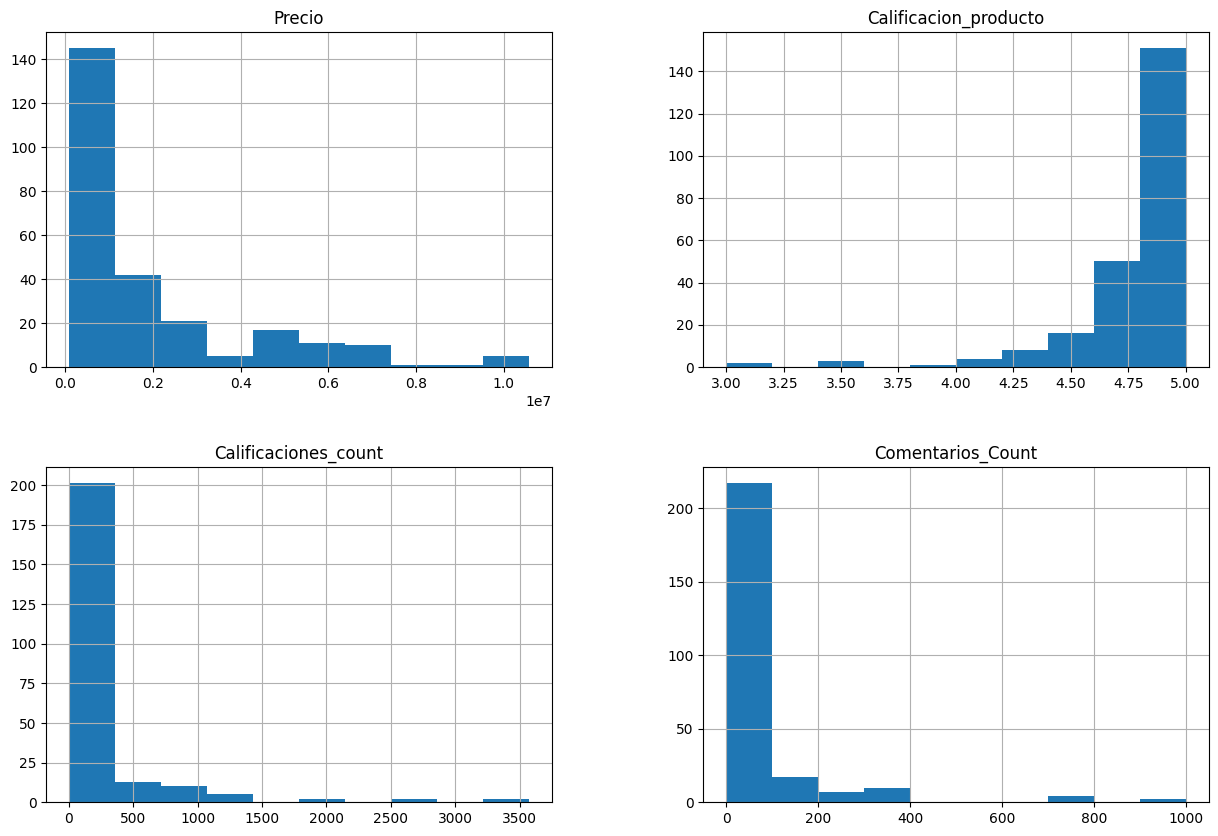

In [12]:
#distribucion variables numericas
import matplotlib.pyplot as plt #Libreria para graficar
import seaborn as sns #Libreria para graficar
df_ML[variables_numericas].hist(figsize=(15,10))
plt.show()

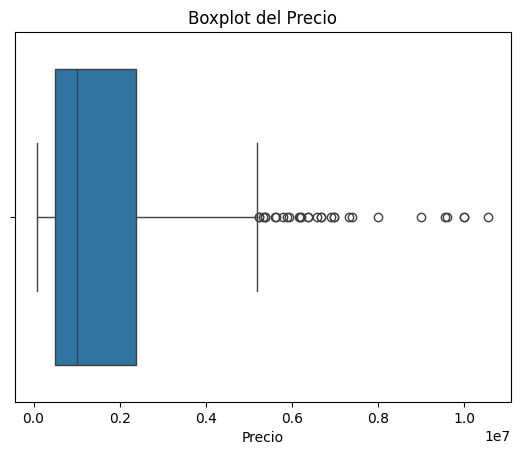

In [13]:
sns.boxplot(x=df_ML['Precio'])
plt.title('Boxplot del Precio')
plt.xlabel('Precio')
plt.show()

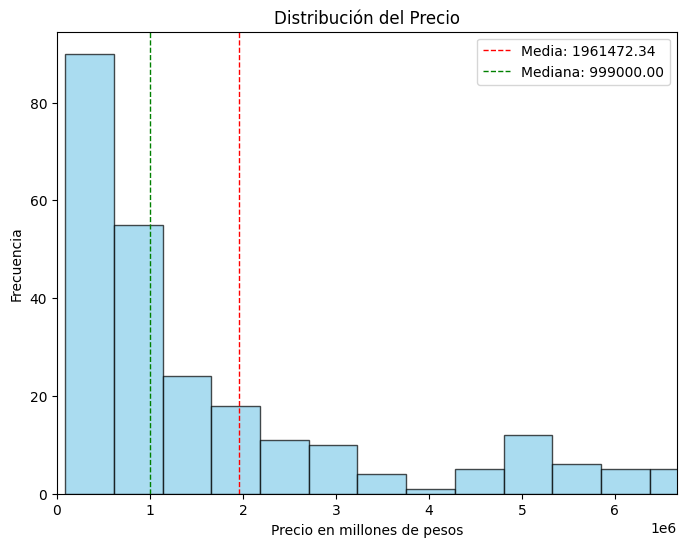

In [14]:
precio_mean = df_ML['Precio'].mean()
precio_median = df_ML['Precio'].median()

plt.figure(figsize=(8, 6))
plt.hist(df_ML['Precio'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(precio_mean, color='red', linestyle='dashed', linewidth=1, label=f'Media: {precio_mean:.2f}')
plt.axvline(precio_median, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {precio_median:.2f}')
plt.title('Distribución del Precio')
plt.xlabel('Precio en millones de pesos')
plt.ylabel('Frecuencia')
plt.xlim(0, df_ML['Precio'].quantile(0.95))  # Mostrar hasta el percentil 95
plt.legend()
plt.show()

In [42]:
#Tabla de frecuencia de la variable 'Nombre_producto', 'Vendedor' y 'Calificacion_Vendedor_Ult'
df_ML['Nombre_producto'].value_counts(normalize=True)



Nombre_producto
samsung galaxy    0.186047
xiaomi redmi      0.100775
apple iphone      0.085271
motorola moto     0.027132
celular xiaomi    0.023256
                    ...   
ipro k1           0.003876
celular oppo      0.003876
pantalla hd+      0.003876
huawei y90        0.003876
rokit io          0.003876
Name: proportion, Length: 88, dtype: float64

In [16]:
#Tabla de frecuencia de la variable 'Vendedor' agrupada por 'Calificacion_Vendedor_Ult'
df_ML.groupby('Vendedor')['Calificacion_Vendedor_Ult'].value_counts().sort_values(ascending=False)


Vendedor                     Calificacion_Vendedor_Ult
n/a                          Platinum                     59
celumovil store              Platinum                     21
camisetasdela 18             Platinum                     21
ekys                         Platinum                     17
mi medellinshop              Platinum                     10
celulares jd                 Gold                          8
n/a                          Gold                          7
celulander                   Gold                          6
_docena                      Platinum                      6
offerbuys                    Platinum                      5
tecnojmgsoluciones           de                            5
tg productos                 Platinum                      4
celubarato.net               Gold                          4
laeternaproductos            Gold                          3
mercadolibre electronica_co  Platinum                      3
rivertechnologyltda          P

In [17]:
# Copiamos la columna 'Comentario' para realizar la limpieza de texto.
df_comentarios = df['Comentario']
df_comentarios

0      [Fue la selección correcta para mis requerimie...
1          [Bueno para cuchos.\nEs 2g, 3g y 4g., Super.]
2      [Llevo ya casi un mes con él y es un excelente...
3      [En teléfono por ese precio. Realmente xiaomi ...
4      [Una bestia de celular, corre todos los juegos...
                             ...                        
253                                    [Sin comentarios]
254    [Exelente., Un celular muy bonito y de buena c...
255                                    [Sin comentarios]
256                                    [Sin comentarios]
257    [El producto se daño unos días de comprado y e...
Name: Comentario, Length: 258, dtype: object

In [18]:
# Convertir la columna 'Comentario' en una lista de Python
comentarios_column = df_comentarios.tolist()

# Aplanar la lista de listas en una sola lista (flatten)
todos_los_comentarios = [comentario for sublista in comentarios_column for comentario in sublista]

# Imprimir la lista combinada
print("Todos los comentarios en una sola lista:")
print(todos_los_comentarios)

Todos los comentarios en una sola lista:
['Fue la selección correcta para mis requerimientos.', 'Bonito.', 'Bueno para cuchos.\nEs 2g, 3g y 4g.', 'Super.', 'Llevo ya casi un mes con él y es un excelente producto, es super rápido, tiene un montón de opciones de personalización, todas sus cámaras son excelentes especialmente para contenido en redes; si es un poco grande pero se acostumbra la mano igual para eso recomiendo accesorios como popsockets o cosas similares; tiene mucho almacenamiento, la batería le dura todo el día sin problema, el único fallo que le veo en cuestión de batería es que la carga rápida no es tan rápida xd y se demora entre 1h 40 minutos a 2h cargando. En conclusión es un excelente producto, lo amo 💕. (las fotos están sin editar y fueron tomadas con la cámara principal de atrás y con la frontal).', 'Recibí tal cuál lo que quería, no me quejaré de alguna especificación del celular porque fui consciente de todo antes de la compra. Personalmente, amé las cámaras, dura

In [19]:
# limpiar los comentarios por medio de una funcion y expresiones regulares.

def limpiar_texto(texto):

    if not isinstance(texto, str):
        return texto  # Retorna el valor original si no es texto
    # Eliminar URLs
    texto = re.sub(r'http\S+', '', texto)
    # Eliminar caracteres especiales y números
    texto = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]', '', texto)
    # Eliminar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Aplicar
todos_los_comentariosl = [limpiar_texto(comentario) for comentario in todos_los_comentarios]

In [20]:
# Vizualizamos los comentarios limpios
todos_los_comentariosl

['Fue la selección correcta para mis requerimientos',
 'Bonito',
 'Bueno para cuchos Es g g y g',
 'Super',
 'Llevo ya casi un mes con él y es un excelente producto es super rápido tiene un montón de opciones de personalización todas sus cámaras son excelentes especialmente para contenido en redes si es un poco grande pero se acostumbra la mano igual para eso recomiendo accesorios como popsockets o cosas similares tiene mucho almacenamiento la batería le dura todo el día sin problema el único fallo que le veo en cuestión de batería es que la carga rápida no es tan rápida xd y se demora entre h minutos a h cargando En conclusión es un excelente producto lo amo las fotos están sin editar y fueron tomadas con la cámara principal de atrás y con la frontal',
 'Recibí tal cuál lo que quería no me quejaré de alguna especificación del celular porque fui consciente de todo antes de la compra Personalmente amé las cámaras duración de la batería precio one iu color y terminado del celular esas so

In [21]:
# Crear un DataFrame con los comentarios
df_comentarios = pd.DataFrame(todos_los_comentariosl, columns=['Comentarios_Usuarios'])
df_comentarios

,Comentarios_Usuarios
0,Fue la selección correcta para mis requerimientos
1,Bonito
2,Bueno para cuchos Es g g y g
3,Super
4,Llevo ya casi un mes con él y es un excelente ...
...,...
535,Sin comentarios
536,Sin comentarios
537,El producto se daño unos días de comprado y el...
538,El producto es de muy mala calidad tiene mal s...


In [22]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [24]:
#!pip install deep-translator
from deep_translator import GoogleTranslator

### Normalizando los comentarios

In [25]:
#convertir los comentarios a minusculas
df_comentarios['Comentarios_Usuarios'] = df_comentarios['Comentarios_Usuarios'].str.lower()
df_comentarios

,Comentarios_Usuarios
0,fue la selección correcta para mis requerimientos
1,bonito
2,bueno para cuchos es g g y g
3,super
4,llevo ya casi un mes con él y es un excelente ...
...,...
535,sin comentarios
536,sin comentarios
537,el producto se daño unos días de comprado y el...
538,el producto es de muy mala calidad tiene mal s...


In [26]:
#traducir los comentarios a ingles
df_comentarios['Comentarios_Usuarios_Eng'] = df_comentarios['Comentarios_Usuarios'].apply(GoogleTranslator(source='es', target='en').translate)
df_comentarios

,Comentarios_Usuarios,Comentarios_Usuarios_Eng
0,fue la selección correcta para mis requerimientos,It was the right choice for my requirements
1,bonito,pretty
2,bueno para cuchos es g g y g,good for cuchos is g g and g
3,super,super
4,llevo ya casi un mes con él y es un excelente ...,I've had it for almost a month now and it's an...
...,...,...
535,sin comentarios,No comments
536,sin comentarios,No comments
537,el producto se daño unos días de comprado y el...,The product was damaged a few days after purch...
538,el producto es de muy mala calidad tiene mal s...,"The product is of very poor quality, it has ba..."


In [27]:
# Muestra de comentarios en inglés.
df_comentarios['Comentarios_Usuarios_Eng']

0            It was the right choice for my requirements
1                                                 pretty
2                           good for cuchos is g g and g
3                                                  super
4      I've had it for almost a month now and it's an...
                             ...                        
535                                          No comments
536                                          No comments
537    The product was damaged a few days after purch...
538    The product is of very poor quality, it has ba...
539    In short, it is a good device. I did not like ...
Name: Comentarios_Usuarios_Eng, Length: 540, dtype: object

In [28]:
# Convertir la columna 'Comentarios_Usuarios_Eng' en una lista de valores tipo str
df_comentarios['Comentarios_Usuarios_Eng'] = df_comentarios['Comentarios_Usuarios_Eng'].astype(str)

In [29]:
# Comparacion de la salida de texto.
df_comentarios

,Comentarios_Usuarios,Comentarios_Usuarios_Eng
0,fue la selección correcta para mis requerimientos,It was the right choice for my requirements
1,bonito,pretty
2,bueno para cuchos es g g y g,good for cuchos is g g and g
3,super,super
4,llevo ya casi un mes con él y es un excelente ...,I've had it for almost a month now and it's an...
...,...,...
535,sin comentarios,No comments
536,sin comentarios,No comments
537,el producto se daño unos días de comprado y el...,The product was damaged a few days after purch...
538,el producto es de muy mala calidad tiene mal s...,"The product is of very poor quality, it has ba..."


In [30]:
# Analisis de sentimientos con la libreria TextBlob.
from textblob import TextBlob

# Crear una función para obtener el sentimiento.
def get_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    return sentiment

# Crear una función para obtener el valor de la subjetividad.

def get_subjectivity(text):
    analysis = TextBlob(text)
    subjectivity = analysis.sentiment.subjectivity
    return subjectivity

# Aplicar las funciónes a cada comentario
df_comentarios['Sentimiento'] = df_comentarios['Comentarios_Usuarios_Eng'].apply(get_sentiment)
df_comentarios['Subjetividad'] = df_comentarios['Comentarios_Usuarios_Eng'].apply(get_subjectivity)

# Mostrar el DataFrame
df_comentarios

,Comentarios_Usuarios,Comentarios_Usuarios_Eng,Sentimiento,Subjetividad
0,fue la selección correcta para mis requerimientos,It was the right choice for my requirements,0.285714,0.535714
1,bonito,pretty,0.250000,1.000000
2,bueno para cuchos es g g y g,good for cuchos is g g and g,0.700000,0.600000
3,super,super,0.333333,0.666667
4,llevo ya casi un mes con él y es un excelente ...,I've had it for almost a month now and it's an...,0.277865,0.591667
...,...,...,...,...
535,sin comentarios,No comments,0.000000,0.000000
536,sin comentarios,No comments,0.000000,0.000000
537,el producto se daño unos días de comprado y el...,The product was damaged a few days after purch...,0.016667,0.477778
538,el producto es de muy mala calidad tiene mal s...,"The product is of very poor quality, it has ba...",-0.101500,0.569333


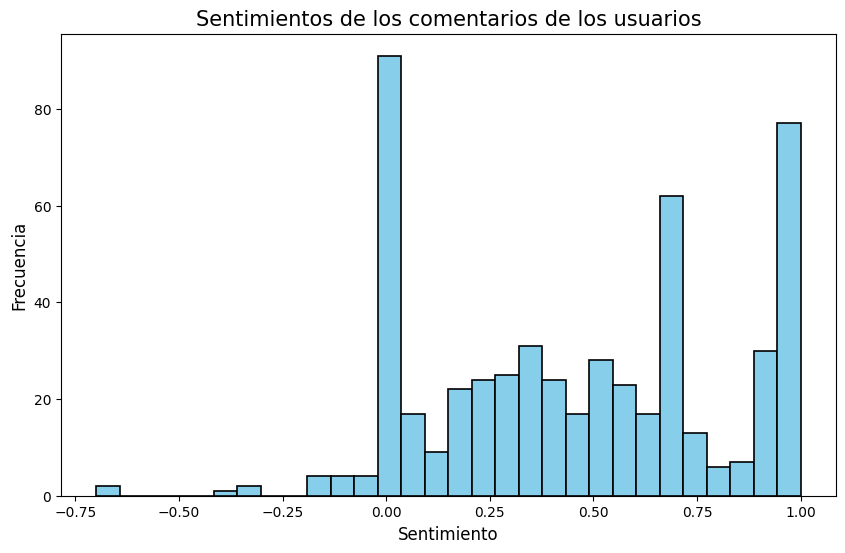

In [31]:
#Graficar los sentimientos de los comentarios
import matplotlib.pyplot as plt

# Crear un histograma de los sentimientos
plt.figure(figsize=(10, 6))
plt.hist(df_comentarios['Sentimiento'], bins=30, color='skyblue', edgecolor='black', linewidth=1.2)

# Agregar títulos y etiquetas
plt.title('Sentimientos de los comentarios de los usuarios', fontsize=15)
plt.xlabel('Sentimiento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la gráfica
plt.show()

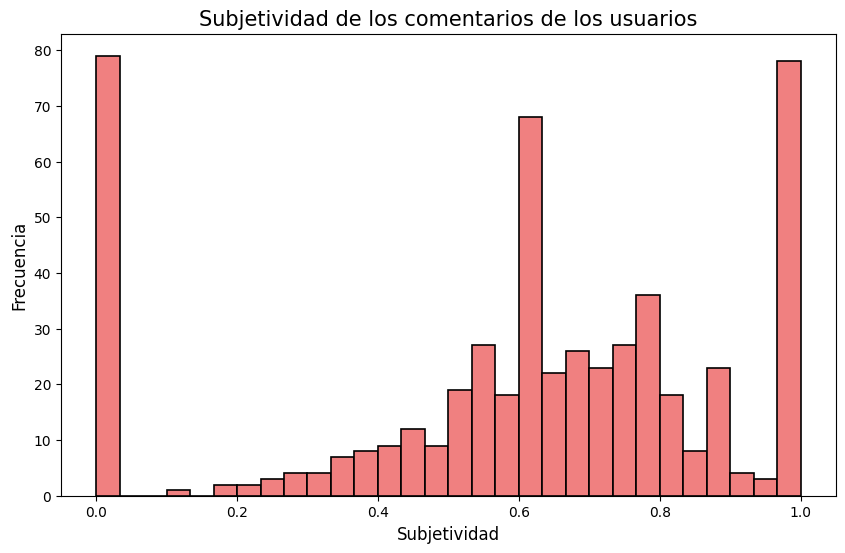

In [32]:
#Graficar la subjetividad de los comentarios

# Crear un histograma de la subjetividad
plt.figure(figsize=(10, 6))
plt.hist(df_comentarios['Subjetividad'], bins=30, color='lightcoral', edgecolor='black', linewidth=1.2)

# Agregar títulos y etiquetas
plt.title('Subjetividad de los comentarios de los usuarios', fontsize=15)
plt.xlabel('Subjetividad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la gráfica
plt.show()

In [33]:
# Calcular el promedio de sentimientos
sentimiento_promedio = df_comentarios['Sentimiento'].mean()

# Calcular el promedio de subjetividad
subjetividad_promedio = df_comentarios['Subjetividad'].mean()

print(f"Promedio de sentimientos: {sentimiento_promedio}")
print(f"Promedio de subjetividad: {subjetividad_promedio}")

Promedio de sentimientos: 0.4610736775439972
Promedio de subjetividad: 0.5955304267892159


## Proecesamiento adicional de los textos.

In [34]:
nltk.download('stopwords') ## Palabras vacias
nltk.download('snowball_data') ## Stemming
nltk.download('wordnet') ## Lematizacion

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
df_comentarios

,Comentarios_Usuarios,Comentarios_Usuarios_Eng,Sentimiento,Subjetividad
0,fue la selección correcta para mis requerimientos,It was the right choice for my requirements,0.285714,0.535714
1,bonito,pretty,0.250000,1.000000
2,bueno para cuchos es g g y g,good for cuchos is g g and g,0.700000,0.600000
3,super,super,0.333333,0.666667
4,llevo ya casi un mes con él y es un excelente ...,I've had it for almost a month now and it's an...,0.277865,0.591667
...,...,...,...,...
535,sin comentarios,No comments,0.000000,0.000000
536,sin comentarios,No comments,0.000000,0.000000
537,el producto se daño unos días de comprado y el...,The product was damaged a few days after purch...,0.016667,0.477778
538,el producto es de muy mala calidad tiene mal s...,"The product is of very poor quality, it has ba...",-0.101500,0.569333


### Normalizacion.

In [36]:
df_normalizacion = df_comentarios.copy()

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar los recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Definir las stopwords en español
stopwords_list = stopwords.words('spanish')

# Eliminar caracteres especiales de la columna 'Comentarios_Usuarios'
df_normalizacion['Comentarios_Usuarios'] = df_normalizacion['Comentarios_Usuarios'].astype(str).str.replace('[^\w\s]', '', regex=True)

# Función para eliminar stopwords
def eliminar_stopwords(comentario):
    # Tokenizar el comentario en palabras individuales
    palabras = word_tokenize(comentario)

    # Filtrar las palabras para eliminar las stopwords
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stopwords_list]

    # Unir las palabras restantes en una cadena de texto
    comentario_limpio = ' '.join(palabras_filtradas)

    return comentario_limpio

# Aplicar la función a la columna 'Comentarios_Usuarios'
df_normalizacion['Comentarios_Usuarios'] = df_normalizacion['Comentarios_Usuarios'].apply(eliminar_stopwords)

# Mostrar el DataFrame con la nueva columna
print(df_normalizacion[['Comentarios_Usuarios']].head())


<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:13: SyntaxWarning: invalid escape sequence '\w'
C:\Users\aluca\AppData\Local\Temp\ipykernel_1012\840260275.py:13: SyntaxWarning: invalid escape sequence '\w'
  df_normalizacion['Comentarios_Usuarios'] = df_normalizacion['Comentarios_Usuarios'].astype(str).str.replace('[^\w\s]', '', regex=True)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                Comentarios_Usuarios
0                  selección correcta requerimientos
1                                             bonito
2                                 bueno cuchos g g g
3                                              super
4  llevo casi mes excelente producto super rápido...


In [38]:
# Aplicar stemming a los comentarios
stemmer = PorterStemmer()


# Aplicar el stemming solo si la lista de palabras no está vacía
df_normalizacion['Comentarios_Usuarios_Stemmer'] = df_normalizacion['Comentarios_Usuarios'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Aplicar Snowball Stemmer a los comentarios

from nltk.stem import SnowballStemmer

stemmer_snowball = SnowballStemmer('english')

df_normalizacion['Comentarios_Usuarios_Snowball'] = df_normalizacion['Comentarios_Usuarios_Eng'].apply(lambda x: ' '.join([stemmer_snowball.stem(word) for word in x.split()]))

# Tokenizar los comentarios
df_normalizacion['Comentarios_Usuarios'] = df_normalizacion['Comentarios_Usuarios'].apply(word_tokenize)


# Mostrar el DataFrame
df_normalizacion

,Comentarios_Usuarios,Comentarios_Usuarios_Eng,Sentimiento,Subjetividad,Comentarios_Usuarios_Stemmer,Comentarios_Usuarios_Snowball
0,"[selección, correcta, requerimientos]",It was the right choice for my requirements,0.285714,0.535714,selección correcta requerimiento,it was the right choic for my requir
1,[bonito],pretty,0.250000,1.000000,bonito,pretti
2,"[bueno, cuchos, g, g, g]",good for cuchos is g g and g,0.700000,0.600000,bueno cucho g g g,good for cucho is g g and g
3,[super],super,0.333333,0.666667,super,super
4,"[llevo, casi, mes, excelente, producto, super,...",I've had it for almost a month now and it's an...,0.277865,0.591667,llevo casi me excelent producto super rápido m...,i'v had it for almost a month now and it an ex...
...,...,...,...,...,...,...
535,[comentarios],No comments,0.000000,0.000000,comentario,no comment
536,[comentarios],No comments,0.000000,0.000000,comentario,no comment
537,"[producto, daño, días, comprado, cliente, solo...",The product was damaged a few days after purch...,0.016667,0.477778,producto daño día comprado client solo dijo ve...,the product was damag a few day after purchas ...
538,"[producto, mala, calidad, mal, sonidoel, puert...","The product is of very poor quality, it has ba...",-0.101500,0.569333,producto mala calidad mal sonidoel puerto carg...,"the product is of veri poor quality, it has ba..."


In [39]:
import pandas as pd
from nltk import ngrams
from nltk.tokenize import word_tokenize

df_normalizacion['Comentarios_Usuarios_Stemmer'] = df_normalizacion['Comentarios_Usuarios_Stemmer'].apply(word_tokenize)

# Función para generar n-gramas
def generar_ngrams(texto_tokenizado, n):
    return list(ngrams(texto_tokenizado, n))

# Generar bigramas (n=2) y trigramas (n=3)
df_normalizacion['Bigrams'] = df_normalizacion['Comentarios_Usuarios_Stemmer'].apply(lambda x: generar_ngrams(x, 2))
df_normalizacion['Trigrams'] = df_normalizacion['Comentarios_Usuarios_Stemmer'].apply(lambda x: generar_ngrams(x, 3))

# Mostrar el DataFrame con los bigramas y trigramas generados
print(df_normalizacion[['Comentarios_Usuarios_Stemmer', 'Bigrams', 'Trigrams']].head())

                        Comentarios_Usuarios_Stemmer  \
0               [selección, correcta, requerimiento]   
1                                           [bonito]   
2                            [bueno, cucho, g, g, g]   
3                                            [super]   
4  [llevo, casi, me, excelent, producto, super, r...   

                                             Bigrams  \
0  [(selección, correcta), (correcta, requerimien...   
1                                                 []   
2       [(bueno, cucho), (cucho, g), (g, g), (g, g)]   
3                                                 []   
4  [(llevo, casi), (casi, me), (me, excelent), (e...   

                                            Trigrams  
0             [(selección, correcta, requerimiento)]  
1                                                 []  
2      [(bueno, cucho, g), (cucho, g, g), (g, g, g)]  
3                                                 []  
4  [(llevo, casi, me), (casi, me, excelent), (me,..

In [40]:
from collections import Counter
import pandas as pd

# Contar las frecuencias de los bigramas
bigram_frequencies = Counter([bigram for sublist in df_normalizacion['Bigrams'] for bigram in sublist])

# Convertir el contador a un DataFrame
bigram_freq_df = pd.DataFrame(bigram_frequencies.items(), columns=['Bigram', 'Frequency'])

# Ordenar el DataFrame por la frecuencia de los bigramas
bigram_freq_df = bigram_freq_df.sort_values(by='Frequency', ascending=False)

# Mostrar los 10 bigramas más comunes
print(bigram_freq_df.head(15))

                    Bigram  Frequency
190       (buen, producto)         34
8     (excelent, producto)         31
32         (batería, dura)         22
89           (gama, media)         17
210         (buen, equipo)         13
526        (buen, celular)         13
341    (excelent, celular)         12
177      (calidad, precio)         11
200       (funciona, bien)         11
343        (buena, cámara)          9
630     (excelent, equipo)          9
1422    (relación, precio)          9
1583     (precio, calidad)          9
4                   (g, g)          8
773   (excelent, teléfono)          8


In [41]:
# contar frecuencia trigramas
trigram_frequencies = Counter([trigram for sublist in df_normalizacion['Trigrams'] for trigram in sublist])
trigram_freq_df = pd.DataFrame(trigram_frequencies.items(), columns=['Trigram', 'Frequency'])
trigram_freq_df = trigram_freq_df.sort_values(by='Frequency', ascending=False)
print(trigram_freq_df.head(15))

                                   Trigram  Frequency
171            (relación, calidad, precio)          8
1567           (relación, precio, calidad)          6
0     (selección, correcta, requerimiento)          5
169             (buen, teléfono, relación)          5
1016                      (samsung, s, fe)          4
1                        (bueno, cucho, g)          4
2                            (cucho, g, g)          4
3                                (g, g, g)          4
31                    (batería, dura, día)          4
331             (excelent, celular, buena)          4
1225            (buen, producto, relación)          4
576       (excelent, producto, recomiendo)          3
914                 (vien, cargador, demá)          3
227         (teléfono, súper, recomendado)          3
594          (momento, funciona, excelent)          3
